In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import statistics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from statistics import mode
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Blood_Pressure_data.csv")
df

,id,patient_no,cast,gender,age group,weight,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,Med,label
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>5
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>5
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


# Data Cleaning

In [3]:
def isNaN(num):
    return num != num

In [4]:
df['diag_1'].value_counts() #428
df['diag_2'].value_counts() #276
df['diag_3'].value_counts() #250

df['diag_1'].replace('?','428',inplace=True)
df['diag_2'].replace('?','276',inplace=True)
df['diag_3'].replace('?','250',inplace=True)

df['diag_1'] = df['diag_1'].astype(str)
df['diag_2'] = df['diag_2'].astype(str)
df['diag_3'] = df['diag_3'].astype(str)



In [5]:
df2=df.replace('?',np.nan)
df2.drop_duplicates(subset = 'patient_no', keep = False, inplace = True)
df2

,id,patient_no,cast,gender,age group,weight,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,Med,label
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>5
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,443842016,183087545,Caucasian,Female,[70-80),NaN,1,1,7,9,...,No,Steady,No,No,No,No,No,Ch,Yes,>5
101755,443842022,188574944,Other,Female,[40-50),NaN,1,1,7,14,...,No,Up,No,No,No,No,No,Ch,Yes,>5
101756,443842070,140199494,Other,Female,[60-70),NaN,1,1,7,2,...,No,Steady,No,No,No,No,No,No,Yes,>5
101758,443842340,120975314,Caucasian,Female,[80-90),NaN,1,1,7,5,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [6]:
df2

,id,patient_no,cast,gender,age group,weight,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,Med,label
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>5
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,443842016,183087545,Caucasian,Female,[70-80),NaN,1,1,7,9,...,No,Steady,No,No,No,No,No,Ch,Yes,>5
101755,443842022,188574944,Other,Female,[40-50),NaN,1,1,7,14,...,No,Up,No,No,No,No,No,Ch,Yes,>5
101756,443842070,140199494,Other,Female,[60-70),NaN,1,1,7,2,...,No,Steady,No,No,No,No,No,No,Yes,>5
101758,443842340,120975314,Caucasian,Female,[80-90),NaN,1,1,7,5,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [7]:
#Checking percentage of NaN values in weight column
count=0
sum1=0
for i in df2.weight:
    if(isNaN(i)==True):
        count+=1
    sum1+=1

print((count/sum1)*100)

95.32925381313362


In [8]:
df2.drop(['cast','payer_code'], axis = 1,inplace=True) 

In [9]:
df2

,id,patient_no,gender,age group,weight,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,Med,label
0,2278392,8222157,Female,[0-10),NaN,6,25,1,1,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Female,[10-20),NaN,1,1,7,3,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,>5
2,64410,86047875,Female,[20-30),NaN,1,1,7,2,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Male,[30-40),NaN,1,1,7,2,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Male,[40-50),NaN,1,1,7,1,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,443842016,183087545,Female,[70-80),NaN,1,1,7,9,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,>5
101755,443842022,188574944,Female,[40-50),NaN,1,1,7,14,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,>5
101756,443842070,140199494,Female,[60-70),NaN,1,1,7,2,NaN,...,No,Steady,No,No,No,No,No,No,Yes,>5
101758,443842340,120975314,Female,[80-90),NaN,1,1,7,5,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [10]:
print(df2.medical_specialty.value_counts(dropna=False))
count=0
mode=df2.medical_specialty.mode()
df2['medical_specialty'].replace(np.nan, 'InternalMedicine',inplace=True)

NaN                       25990
InternalMedicine           8812
Family/GeneralPractice     3800
Cardiology                 3466
Emergency/Trauma           2958
                          ...  
Perinatology                  1
Neurophysiology               1
Psychiatry-Addictive          1
Resident                      1
Pediatrics-Pulmonology        1
Name: medical_specialty, Length: 68, dtype: int64


In [11]:
print(df2.medical_specialty.value_counts(dropna=False))

InternalMedicine          34802
Family/GeneralPractice     3800
Cardiology                 3466
Emergency/Trauma           2958
Surgery-General            1775
                          ...  
Pediatrics-Pulmonology        1
Speech                        1
Psychiatry-Addictive          1
Perinatology                  1
Proctology                    1
Name: medical_specialty, Length: 67, dtype: int64


In [12]:
df2

,id,patient_no,gender,age group,weight,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,Med,label
0,2278392,8222157,Female,[0-10),NaN,6,25,1,1,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Female,[10-20),NaN,1,1,7,3,InternalMedicine,...,No,Up,No,No,No,No,No,Ch,Yes,>5
2,64410,86047875,Female,[20-30),NaN,1,1,7,2,InternalMedicine,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Male,[30-40),NaN,1,1,7,2,InternalMedicine,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Male,[40-50),NaN,1,1,7,1,InternalMedicine,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,443842016,183087545,Female,[70-80),NaN,1,1,7,9,InternalMedicine,...,No,Steady,No,No,No,No,No,Ch,Yes,>5
101755,443842022,188574944,Female,[40-50),NaN,1,1,7,14,InternalMedicine,...,No,Up,No,No,No,No,No,Ch,Yes,>5
101756,443842070,140199494,Female,[60-70),NaN,1,1,7,2,InternalMedicine,...,No,Steady,No,No,No,No,No,No,Yes,>5
101758,443842340,120975314,Female,[80-90),NaN,1,1,7,5,InternalMedicine,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [13]:
#Checking remaining NaN values
def check_nans(df2):
    for i in df2:  
        sum1=0
        for j in df2[i]:
            if(isNaN(j)):
                sum1+=1
        print(i,sum1)

In [14]:
check_nans(df2)

id 0
patient_no 0
gender 0
age group 0
weight 52188
admission_typeid 0
discharge_disposition_id 0
admission_source_id 0
time_in_hospital 0
medical_specialty 0
num_lab_procedures 0
num_procedures 0
num_medications 0
number_outpatient 0
number_emergency 0
number_inpatient 0
diag_1 0
diag_2 0
diag_3 0
number_diagnoses 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
Med 0
label 0


In [15]:
df2.drop(['weight'],axis=1,inplace=True)

In [16]:
order={"[0-10)":5,"[10-20)":15,"[20-30)":25,"[30-40)":35,"[40-50)":45,"[50-60)":55,"[60-70)":65,
       "[70-80)":75,"[80-90)":85,"[90-100)":95}

df2['age group']=df2['age group'].map(order)  

In [17]:
df2

,id,patient_no,gender,age group,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,Med,label
0,2278392,8222157,Female,5,6,25,1,1,Pediatrics-Endocrinology,41,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Female,15,1,1,7,3,InternalMedicine,59,...,No,Up,No,No,No,No,No,Ch,Yes,>5
2,64410,86047875,Female,25,1,1,7,2,InternalMedicine,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Male,35,1,1,7,2,InternalMedicine,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Male,45,1,1,7,1,InternalMedicine,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,443842016,183087545,Female,75,1,1,7,9,InternalMedicine,50,...,No,Steady,No,No,No,No,No,Ch,Yes,>5
101755,443842022,188574944,Female,45,1,1,7,14,InternalMedicine,73,...,No,Up,No,No,No,No,No,Ch,Yes,>5
101756,443842070,140199494,Female,65,1,1,7,2,InternalMedicine,46,...,No,Steady,No,No,No,No,No,No,Yes,>5
101758,443842340,120975314,Female,85,1,1,7,5,InternalMedicine,76,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [18]:
df2.replace('Unknown/Invalid','Female',inplace=True)
df2.gender.value_counts()

Female    28825
Male      25920
Name: gender, dtype: int64

In [19]:
pd.set_option('max_columns', None)

# Data Encoding

In [20]:
df3=df2.copy()
oe=OrdinalEncoder()
oh_enc=OneHotEncoder(dtype=np.int,sparse=False)
df3.drop(['num_procedures','number_outpatient'],axis=1,inplace=True)
df3.drop(['troglitazone','tolazamide','examide','citoglipton','acetohexamide','repaglinide'],
         axis=1,inplace=True)
df3.drop(['glimepiride','metformin','insulin','change'],axis=1,inplace=True)
df3.drop(['rosiglitazone','glyburide','pioglitazone','A1Cresult','tolbutamide'],
            axis=1,inplace=True)
df3.drop(['glipizide','miglitol'],axis=1,inplace=True)
df3.drop(['glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone'],
         axis=1,inplace=True)  
    
try:     
    df3['gender']=oh_enc.fit_transform(df3[['gender']])
    df3['Med']=oh_enc.fit_transform(df3[['Med']]) 
    df3['chlorpropamide']=oe.fit_transform(df3[['chlorpropamide']])
    df3['nateglinide']=oe.fit_transform(df3[['nateglinide']])
    df3['medical_specialty']=oe.fit_transform(df3[['medical_specialty']])
    df3['acarbose']=oe.fit_transform(df3[['acarbose']])
    df3['max_glu_serum']=oe.fit_transform(df3[['max_glu_serum']])                               
    df3['glyburide-metformin']=oe.fit_transform(df3[['glyburide-metformin']])                                          
    df3['glipizide-metformin']=oe.fit_transform(df3[['glipizide-metformin']])                                          
    df3['diag_1']=oe.fit_transform(df3[['diag_1']])
    df3['diag_2']=oe.fit_transform(df3[['diag_2']])
    df3['diag_3']=oe.fit_transform(df3[['diag_3']])

except:
    print("Error")

In [21]:
df3

,id,patient_no,gender,age group,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_medications,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,nateglinide,chlorpropamide,acarbose,glyburide-metformin,glipizide-metformin,Med,label
0,2278392,8222157,1,5,6,25,1,1,35.0,41,1,0,0,161.0,169.0,120.0,1,2.0,1.0,1.0,0.0,1.0,0.0,1,NO
1,149190,55629189,1,15,1,1,7,3,17.0,59,18,0,0,177.0,120.0,153.0,9,2.0,1.0,1.0,0.0,1.0,0.0,0,>5
2,64410,86047875,1,25,1,1,7,2,17.0,11,13,0,1,454.0,119.0,18.0,6,2.0,1.0,1.0,0.0,1.0,0.0,0,NO
3,500364,82442376,0,35,1,1,7,2,17.0,44,16,0,0,3.0,135.0,272.0,7,2.0,1.0,1.0,0.0,1.0,0.0,0,NO
4,16680,42519267,0,45,1,1,7,1,17.0,51,8,0,0,94.0,70.0,120.0,5,2.0,1.0,1.0,0.0,1.0,0.0,0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,443842016,183087545,1,75,1,1,7,9,17.0,50,33,0,0,399.0,393.0,122.0,9,2.0,1.0,1.0,0.0,1.0,0.0,0,>5
101755,443842022,188574944,1,45,1,1,7,14,17.0,73,26,1,0,414.0,414.0,355.0,9,2.0,1.0,1.0,0.0,1.0,0.0,0,>5
101756,443842070,140199494,1,65,1,1,7,2,17.0,46,17,1,1,666.0,403.0,272.0,9,2.0,1.0,1.0,0.0,1.0,0.0,0,>5
101758,443842340,120975314,1,85,1,1,7,5,17.0,76,22,1,0,192.0,3.0,197.0,9,2.0,1.0,1.0,0.0,1.0,0.0,0,NO


In [22]:
pd.reset_option('max_columns')

# Data splitting and normalization

In [23]:
train=df3.drop('label',axis=1)
test=df3['label']
X=train.to_numpy()
Y=test.to_numpy()

X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=51)
sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
sc.fit(X_test)
X_test=sc.transform(X_test)

# Machine Learning Algorithms

In [24]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf = clf.fit(X_train,Y_train)
y_pred2 = clf.predict(X_test)
print("\nDecision Tree Accuracy:",metrics.accuracy_score(Y_test, y_pred2)*100,'%')
print("Decision Tree F1 score : ", f1_score(Y_test, y_pred2, average='micro')*100, '%')

scores_list=[]
knn=KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train,Y_train)
y_pred3=knn.predict(X_test)
scores=metrics.accuracy_score(Y_test,y_pred3)
scores_list.append(metrics.accuracy_score(Y_test,y_pred3))   
print("\nKNN Accuracy:",scores_list[0]*100,'%')
print("KNN F1 score : ", f1_score(Y_test, y_pred3, average='micro')*100, '%')

clf = LogisticRegression(random_state=0).fit(X_train, Y_train)
y_pred4=clf.predict(X_test)
print("\nLogistic Regression Accuracy:",metrics.accuracy_score(Y_test, y_pred4)*100,'%')
print("Logistic Regression F1 score : ", f1_score(Y_test, y_pred4, average='micro')*100, '%')

clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
clf.fit(X_train, Y_train)
y_pred5=clf.predict(X_test)
print("\nGradient Boosting Accuracy:",metrics.accuracy_score(Y_test, y_pred5)*100,'%')
print("Gradient Boosting F1 score : ", f1_score(Y_test, y_pred5, average='micro')*100, '%')

clf = make_pipeline(StandardScaler(),LinearSVC(random_state=0, tol=1e-5))
clf.fit(X_train,Y_train)
y_pred6=clf.predict(X_test)
print("\nSVC Accuracy:",metrics.accuracy_score(Y_test, y_pred6)*100,'%')
print("SVC F1 score : ", f1_score(Y_test, y_pred6, average='micro')*100, '%')

clf = RandomForestClassifier(max_depth=25, random_state=51)
clf.fit(X_train, Y_train)
y_pred7=clf.predict(X_test)
print("\nRandom Forest Accuracy:",metrics.accuracy_score(Y_test, y_pred7)*100,'%')
print("Random Forest F1 score : ", f1_score(Y_test, y_pred7, average='micro')*100, '%')

clf=MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=51)
clf.fit(X_train,Y_train)
y_pred8=clf.predict(X_test)
print("\nNeural Network Accuracy:",metrics.accuracy_score(Y_test, y_pred8)*100,'%')
print("Neural Network F1 score : ", f1_score(Y_test, y_pred8, average='micro')*100, '%')


Decision Tree Accuracy: 78.09845648004384 %
Decision Tree F1 score :  78.09845648004384 %

KNN Accuracy: 78.0345237007946 %
KNN F1 score :  78.0345237007946 %

Logistic Regression Accuracy: 78.22632203854234 %
Logistic Regression F1 score :  78.22632203854234 %

Gradient Boosting Accuracy: 78.48205315553932 %
Gradient Boosting F1 score :  78.48205315553932 %

SVC Accuracy: 78.1075897342223 %
SVC F1 score :  78.1075897342223 %

Random Forest Accuracy: 78.53685268061011 %
Random Forest F1 score :  78.53685268061011 %

Neural Network Accuracy: 78.45465339300392 %
Neural Network F1 score :  78.45465339300391 %


In [25]:
final_arr=[]
for i in range(len(y_pred2)):
    final_arr.append(statistics.mode([y_pred2[i],y_pred3[i],
                                      y_pred4[i],y_pred5[i],y_pred6[i],y_pred7[i],y_pred8[i]]))
print('Accuracy:',metrics.accuracy_score(Y_test, final_arr)*100,'%')
print('F1 Score:',f1_score(Y_test,final_arr,average='micro')*100,'%')

Accuracy: 78.47291990136085 %
F1 Score: 78.47291990136085 %


# Data Visualization


#### We will be analyzing our machine learning algorithms first

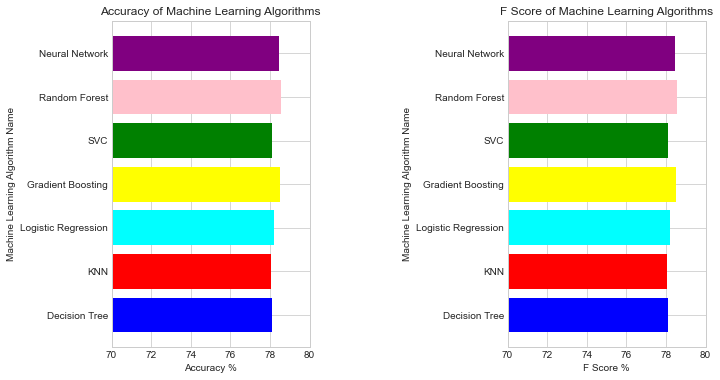

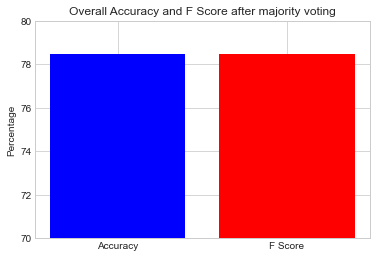

In [26]:
ml=['Decision Tree','KNN','Logistic Regression','Gradient Boosting','SVC','Random Forest','Neural Network']
sc=[metrics.accuracy_score(Y_test, y_pred2)*100,scores_list[0]*100,
    metrics.accuracy_score(Y_test, y_pred4)*100,metrics.accuracy_score(Y_test, y_pred5)*100,
   metrics.accuracy_score(Y_test, y_pred6)*100,metrics.accuracy_score(Y_test, y_pred7)*100,
   metrics.accuracy_score(Y_test, y_pred8)*100]
fc=[f1_score(Y_test, y_pred2, average='micro')*100,f1_score(Y_test, y_pred3, average='micro')*100,
   f1_score(Y_test, y_pred4, average='micro')*100,f1_score(Y_test, y_pred5, average='micro')*100,
   f1_score(Y_test, y_pred6, average='micro')*100,f1_score(Y_test, y_pred7, average='micro')*100,
   f1_score(Y_test, y_pred8, average='micro')*100]
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(6, 6))
plt.subplot(121)
plt.title("Accuracy of Machine Learning Algorithms")
plt.xlabel("Accuracy %")
plt.ylabel("Machine Learning Algorithm Name")
plt.xlim(70, 80)
plt.barh(ml,sc,color=['blue', 'red','cyan','yellow','green','pink','purple'])

plt.subplot(122)
plt.title("F Score of Machine Learning Algorithms")
plt.xlabel("F Score %")
plt.ylabel("Machine Learning Algorithm Name")
plt.barh(ml,fc,color=['blue', 'red','cyan','yellow','green','pink','purple'])
plt.subplots_adjust(left=None, bottom=None, right=1.5, top=None, wspace=1, hspace=None)
plt.xlim(70, 80)
plt.show()

label=['Accuracy','F Score']
acc=[metrics.accuracy_score(Y_test, final_arr)*100,f1_score(Y_test,final_arr,average='micro')*100]
plt.ylim(70,80)
plt.title("Overall Accuracy and F Score after majority voting")
plt.ylabel("Percentage")
plt.bar(label,acc,color=['blue', 'red'])
plt.show()

### We can see that the accuracy and the F1 Score of the machine learning algorithms we applied were quite similar, with almost all of them averaging above 78% Accuracy and F Score

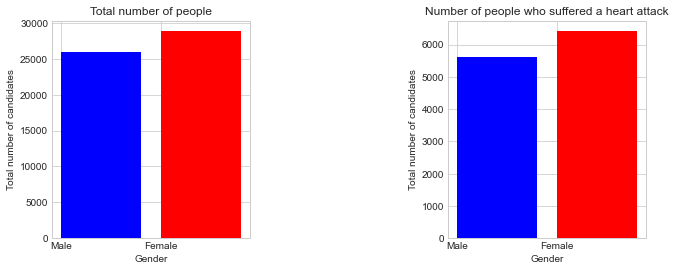

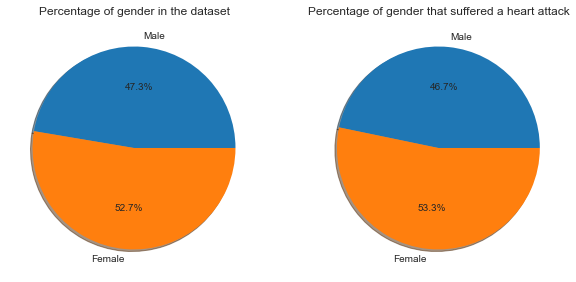

In [27]:
labels=['Male','Female']
arr=[]
arr.append(sum(df3['gender']==0))
arr.append(sum(df3['gender']==1))

plt.subplot(121)
plt.bar(labels,arr,align='edge',color=['blue', 'red'])
plt.title("Total number of people")
plt.xlabel("Gender")
plt.ylabel("Total number of candidates")

plt.subplot(122)
list1_0 = df3[df3['label']=='>5']
list1=df3[df3['label']=='<30']
list1=list1.append(list1_0)
list1 = list1[list1['gender'] == 1] #F
    
list2_0 = df3[df3['label']=='>5']
list2=df3[df3['label']=='<30']
list2=list2.append(list2_0)
list2 = list2[list2['gender'] == 0] #M

arr1=[]
arr1.append(len(list2))
arr1.append(len(list1))
plt.bar(labels,arr1,align='edge',color=['blue', 'red'])
plt.title("Number of people who suffered a heart attack")
plt.xlabel("Gender")
plt.ylabel("Total number of candidates")
plt.subplots_adjust(left=None, bottom=None, right=1.5, top=None, wspace=1, hspace=None)
plt.show()

plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.pie(arr,labels=labels,autopct='%1.1f%%',shadow=True)
plt.title("Percentage of gender in the dataset")

plt.subplot(122)
plt.title("Percentage of gender that suffered a heart attack")
plt.pie(arr1,labels=labels,autopct='%1.1f%%',shadow=True)
plt.show()

### Judging by the total number of percentage of genders in the dataset, and the total number of heart attack percentages, we can conclude that females are more likely to experience heart attacks

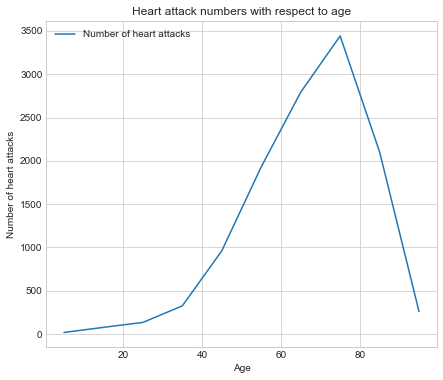

In [28]:
arr1=[]
arr1.append(df3['age group'][0])
arr1.append(df3['age group'][1])
arr1.append(df3['age group'][2])
arr1.append(df3['age group'][3])
arr1.append(df3['age group'][4])
arr1.append(df3['age group'][5])
arr1.append(df3['age group'][6])
arr1.append(df3['age group'][7])
arr1.append(df3['age group'][8])
arr1.append(df3['age group'][9])
arr1

arr2=[]
list1_0 = df3[df3['label']=='>5']
list1=df3[df3['label']=='<30']
list1=list1.append(list1_0)
list1 = list1[list1['age group'] == 5]
arr2.append(len(list1))

list1_0 = df3[df3['label']=='>5']
list1=df3[df3['label']=='<30']
list1=list1.append(list1_0)
list1 = list1[list1['age group'] == 15]
arr2.append(len(list1))

list1_0 = df3[df3['label']=='>5']
list1=df3[df3['label']=='<30']
list1=list1.append(list1_0)
list1 = list1[list1['age group'] == 25]
arr2.append(len(list1))

list1_0 = df3[df3['label']=='>5']
list1=df3[df3['label']=='<30']
list1=list1.append(list1_0)
list1 = list1[list1['age group'] == 35]
arr2.append(len(list1))

list1_0 = df3[df3['label']=='>5']
list1=df3[df3['label']=='<30']
list1=list1.append(list1_0)
list1 = list1[list1['age group'] == 45]
arr2.append(len(list1))

list1_0 = df3[df3['label']=='>5']
list1=df3[df3['label']=='<30']
list1=list1.append(list1_0)
list1 = list1[list1['age group'] == 55]
arr2.append(len(list1))

list1_0 = df3[df3['label']=='>5']
list1=df3[df3['label']=='<30']
list1=list1.append(list1_0)
list1 = list1[list1['age group'] == 65]
arr2.append(len(list1))

list1_0 = df3[df3['label']=='>5']
list1=df3[df3['label']=='<30']
list1=list1.append(list1_0)
list1 = list1[list1['age group'] == 75]
arr2.append(len(list1))

list1_0 = df3[df3['label']=='>5']
list1=df3[df3['label']=='<30']
list1=list1.append(list1_0)
list1 = list1[list1['age group'] == 85]
arr2.append(len(list1))

list1_0 = df3[df3['label']=='>5']
list1=df3[df3['label']=='<30']
list1=list1.append(list1_0)
list1 = list1[list1['age group'] == 95]
arr2.append(len(list1))

plt.figure(figsize=(7,6))
plt.title("Heart attack numbers with respect to age")
plt.xlabel("Age")
plt.ylabel("Number of heart attacks")
plt.plot(arr1,arr2,label="Number of heart attacks")
plt.legend()
plt.show()

### Judging by the above graph, patients with a higher age are more likely to experience heart attacks. However, that number drops down after an age group of 75-80. Patients with an age between 70-75 are most likely to experience heart attacks

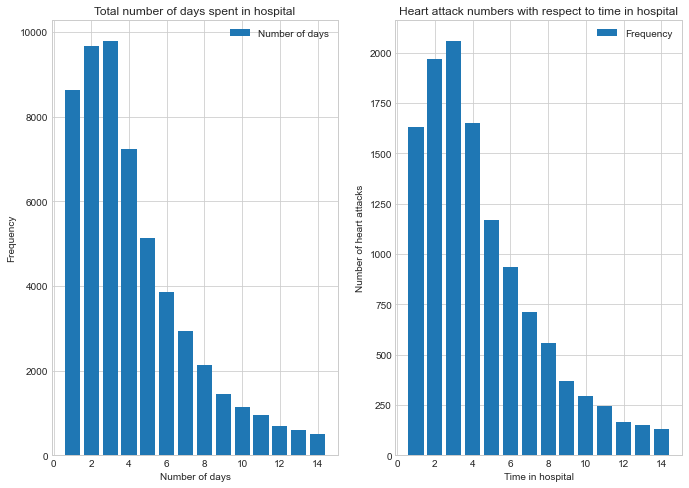

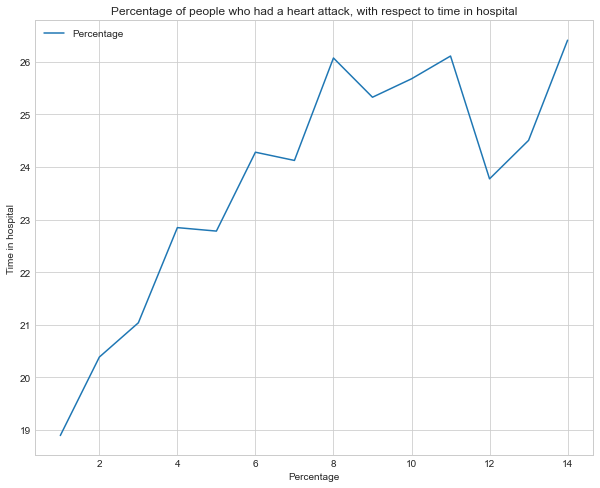

In [29]:
x=df3['time_in_hospital'].value_counts()
arr1=[]
arr1.append(x[1])
arr1.append(x[2])
arr1.append(x[3])
arr1.append(x[4])
arr1.append(x[5])
arr1.append(x[6])
arr1.append(x[7])
arr1.append(x[8])
arr1.append(x[9])
arr1.append(x[10])
arr1.append(x[11])
arr1.append(x[12])
arr1.append(x[13])
arr1.append(x[14])
arr3=np.arange(1,15)
plt.figure(figsize=(10,8))
plt.subplot(121)
plt.bar(arr3,arr1,label="Number of days")
plt.legend()
plt.title("Total number of days spent in hospital")
plt.xlabel("Number of days")
plt.ylabel("Frequency")

arr2=[]
list1_0 = df3[df3['label']=='>5']
list1=df3[df3['label']=='<30']
list1=list1.append(list1_0)
list1 = list1[list1['time_in_hospital'] == 1]
arr2.append(len(list1))

list1_0 = df3[df3['label']=='>5']
list1=df3[df3['label']=='<30']
list1=list1.append(list1_0)
list1 = list1[list1['time_in_hospital'] == 2]
arr2.append(len(list1))

list1_0 = df3[df3['label']=='>5']
list1=df3[df3['label']=='<30']
list1=list1.append(list1_0)
list1 = list1[list1['time_in_hospital'] == 3]
arr2.append(len(list1))

list1_0 = df3[df3['label']=='>5']
list1=df3[df3['label']=='<30']
list1=list1.append(list1_0)
list1 = list1[list1['time_in_hospital'] == 4]
arr2.append(len(list1))

list1_0 = df3[df3['label']=='>5']
list1=df3[df3['label']=='<30']
list1=list1.append(list1_0)
list1 = list1[list1['time_in_hospital'] == 5]
arr2.append(len(list1))

list1_0 = df3[df3['label']=='>5']
list1=df3[df3['label']=='<30']
list1=list1.append(list1_0)
list1 = list1[list1['time_in_hospital'] == 6]
arr2.append(len(list1))

list1_0 = df3[df3['label']=='>5']
list1=df3[df3['label']=='<30']
list1=list1.append(list1_0)
list1 = list1[list1['time_in_hospital'] == 7]
arr2.append(len(list1))

list1_0 = df3[df3['label']=='>5']
list1=df3[df3['label']=='<30']
list1=list1.append(list1_0)
list1 = list1[list1['time_in_hospital'] == 8]
arr2.append(len(list1))

list1_0 = df3[df3['label']=='>5']
list1=df3[df3['label']=='<30']
list1=list1.append(list1_0)
list1 = list1[list1['time_in_hospital'] == 9]
arr2.append(len(list1))

list1_0 = df3[df3['label']=='>5']
list1=df3[df3['label']=='<30']
list1=list1.append(list1_0)
list1 = list1[list1['time_in_hospital'] == 10]
arr2.append(len(list1))

list1_0 = df3[df3['label']=='>5']
list1=df3[df3['label']=='<30']
list1=list1.append(list1_0)
list1 = list1[list1['time_in_hospital'] == 11]
arr2.append(len(list1))

list1_0 = df3[df3['label']=='>5']
list1=df3[df3['label']=='<30']
list1=list1.append(list1_0)
list1 = list1[list1['time_in_hospital'] == 12]
arr2.append(len(list1))

list1_0 = df3[df3['label']=='>5']
list1=df3[df3['label']=='<30']
list1=list1.append(list1_0)
list1 = list1[list1['time_in_hospital'] == 13]
arr2.append(len(list1))

list1_0 = df3[df3['label']=='>5']
list1=df3[df3['label']=='<30']
list1=list1.append(list1_0)
list1 = list1[list1['time_in_hospital'] == 14]
arr2.append(len(list1))

plt.subplot(122)
plt.title("Heart attack numbers with respect to time in hospital")
plt.xlabel("Time in hospital")
plt.ylabel("Number of heart attacks")
plt.bar(arr3,arr2,label="Frequency")
plt.legend()
plt.subplots_adjust(left=None, bottom=None, right=1, top=None, wspace=None, hspace=None)
plt.show()

res = [(i / j)*100 for i, j in zip(arr2, arr1)] 
plt.figure(figsize=(10,8))
plt.plot(arr3,res,label="Percentage")
plt.legend()
plt.title("Percentage of people who had a heart attack, with respect to time in hospital")
plt.xlabel("Percentage")
plt.ylabel("Time in hospital")
plt.show()

### The first graph shows the total frequency of patients, grouped by the total number of days spent in the hospital, while the second graph show the respective heart attack numbers for patients, grouped by the total number of days spent in the hospital

### The third graph at the bottom shows the percentage of the patients that spent a specific amount of time in the hospital, who had a heart attack. Judging from the graph, we can conclude that as patients spend more time in the hospital, the probability to experience a heart attack increases, with the most being at the 14 day mark.

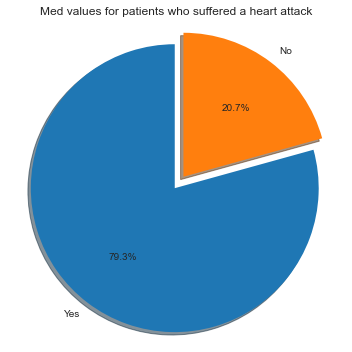

In [30]:
df3['Med'].value_counts() #0 - yes, 1 - no
arr2=[]
list1_0 = df3[df3['label']=='>5']
list1=df3[df3['label']=='<30']
list1=list1.append(list1_0)
list1 = list1[list1['Med'] == 0]
arr2.append(len(list1))

list1_0 = df3[df3['label']=='>5']
list1=df3[df3['label']=='<30']
list1=list1.append(list1_0)
list1 = list1[list1['Med'] == 1]
arr2.append(len(list1))

labels=["Yes","No"]
plt.figure(figsize=(5, 5))
plt.pie(arr2,labels=labels,autopct='%1.1f%%',explode=(0,0.1),shadow=True,startangle=90)
plt.axis('equal')
plt.title("Med values for patients who suffered a heart attack")
plt.tight_layout()
plt.show()

### Judging from the above pie chart, we can see that an overwhelming majority of the patients who suffered a heart attack had a 'Med' value of 'Yes', hence showing that such a patient is more likely to experience heart attacks

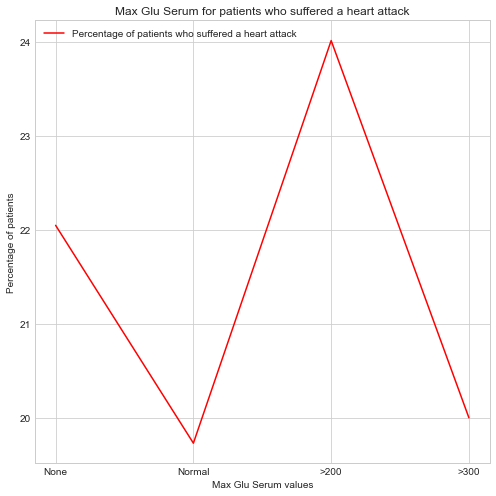

In [31]:
df3['max_glu_serum'].value_counts() #2 - None, 3 - Normal, >200 - 0, >300 - 1

arr2=[]
list1_0 = df3[df3['label']=='>5']
list1=df3[df3['label']=='<30']
list1=list1.append(list1_0)
list1 = list1[list1['max_glu_serum'] == 2]
arr2.append((len(list1)/52275)*100)

list1_0 = df3[df3['label']=='>5']
list1=df3[df3['label']=='<30']
list1=list1.append(list1_0)
list1 = list1[list1['max_glu_serum'] == 3]
arr2.append((len(list1)/1262)*100)

list1_0 = df3[df3['label']=='>5']
list1=df3[df3['label']=='<30']
list1=list1.append(list1_0)
list1 = list1[list1['max_glu_serum'] == 0]
arr2.append((len(list1)/708)*100)

list1_0 = df3[df3['label']=='>5']
list1=df3[df3['label']=='<30']
list1=list1.append(list1_0)
list1 = list1[list1['max_glu_serum'] == 1]
arr2.append((len(list1)/500)*100)

labels=['None','Normal','>200','>300']
plt.figure(figsize=(7, 7))
plt.plot(labels,arr2,label='Percentage of patients who suffered a heart attack',color="red")
plt.legend()
plt.title("Max Glu Serum for patients who suffered a heart attack")
plt.xlabel("Max Glu Serum values")
plt.ylabel("Percentage of patients")
plt.tight_layout()
plt.show()

### By the above graph, we can observe that patients with a Max Glu Serum value of >200 were most prone to heart attacks, while patients with a 'Normal' value were least prone, as expected